In [56]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
import warnings
warnings.filterwarnings("ignore") 
# Load the dataset
df = pd.read_csv('titanic.csv')

# Display first 5 rows
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [57]:
# Check for missing values
df.isnull().sum()

# Fill missing 'Embarked' with mode
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Fill missing 'Age' with median
df['Age'].fillna(df['Age'].median(), inplace=True)

# Drop 'Cabin' since too many values are missing
df.drop(columns=['Cabin'], inplace=True)

# Drop columns that won't help in prediction
df.drop(columns=['PassengerId', 'Name', 'Ticket'], inplace=True)

# Check cleaned dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  418 non-null    int64  
 1   Pclass    418 non-null    int64  
 2   Sex       418 non-null    object 
 3   Age       418 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Fare      417 non-null    float64
 7   Embarked  418 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 26.2+ KB


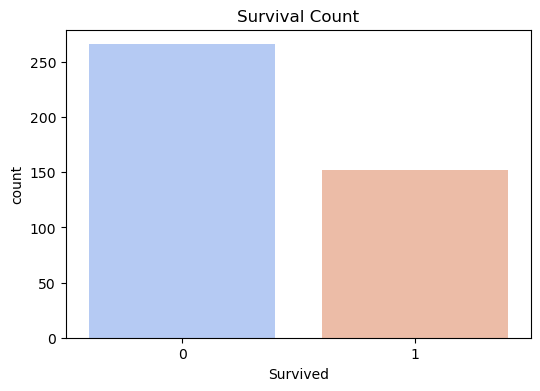

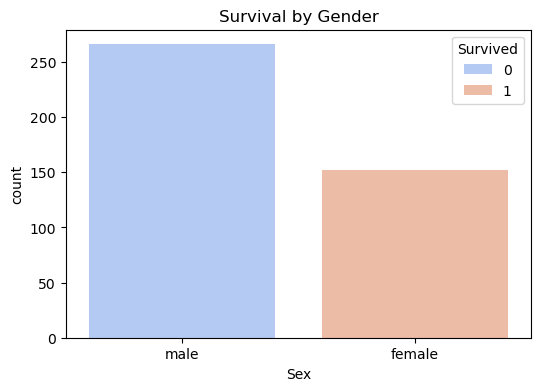

In [58]:
# Countplot of survival
plt.figure(figsize=(6,4))
sns.countplot(x='Survived', data=df, palette='coolwarm')
plt.title('Survival Count')
plt.show()

#Survival by gender
plt.figure(figsize=(6,4))
sns.countplot(x='Sex', hue='Survived', data=df, palette='coolwarm')
plt.title('Survival by Gender')
plt.show()


In [59]:
# One-hot encoding for categorical variables
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)

# Create Family Size feature
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

# Drop 'SibSp' and 'Parch' since FamilySize replaces them
df.drop(columns=['SibSp', 'Parch'], inplace=True)

df.head()

,Survived,Pclass,Age,Fare,Sex_male,Embarked_Q,Embarked_S,FamilySize
0,0,3,34.5,7.8292,True,True,False,1
1,1,3,47.0,7.0000,False,False,True,2
2,0,2,62.0,9.6875,True,True,False,1
3,0,3,27.0,8.6625,True,False,True,1
4,1,3,22.0,12.2875,False,False,True,3


In [60]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Survived'])  # Features
y = df['Survived']  # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [61]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train[['Age', 'Fare', 'FamilySize']] = scaler.fit_transform(X_train[['Age', 'Fare', 'FamilySize']])
X_test[['Age', 'Fare', 'FamilySize']] = scaler.transform(X_test[['Age', 'Fare', 'FamilySize']])

In [62]:
# Fill any remaining NaN values before conversion
X_train = X_train.fillna(0)
X_test = X_test.fillna(0)

# Convert boolean columns to integers
X_train = X_train.astype(int)
X_test = X_test.astype(int)

In [63]:
#Logistic Regression
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))

Logistic Regression Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



In [64]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(max_depth=5)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))

Decision Tree Accuracy: 1.0


In [65]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

Random Forest Accuracy: 1.0


In [66]:
# ANN Model
from sklearn.neural_network import MLPClassifier

ann_model = MLPClassifier(hidden_layer_sizes=(64,32), activation='relu', max_iter=500)
ann_model.fit(X_train, y_train)
y_pred_ann = ann_model.predict(X_test)

print("ANN Accuracy:", accuracy_score(y_test, y_pred_ann))

ANN Accuracy: 1.0


In [67]:
# AdaBoost Classifier
from sklearn.ensemble import AdaBoostClassifier

ada_model = AdaBoostClassifier(n_estimators=100)
ada_model.fit(X_train, y_train)
y_pred_ada = ada_model.predict(X_test)

print("AdaBoost Accuracy:", accuracy_score(y_test, y_pred_ada))

# Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier(n_estimators=100)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)

print("Gradient Boost Accuracy:", accuracy_score(y_test, y_pred_gb))

# XGBoost Classifier

xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))


AdaBoost Accuracy: 1.0
Gradient Boost Accuracy: 1.0
XGBoost Accuracy: 1.0


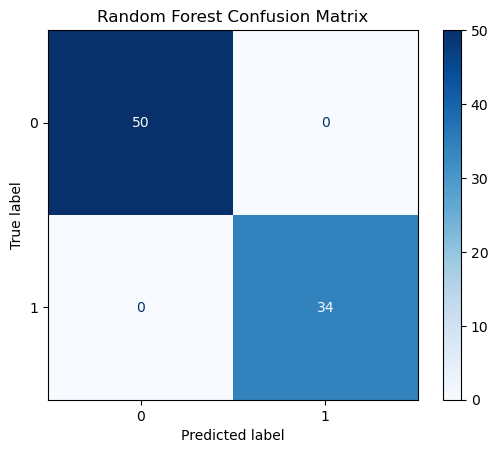

In [68]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap="Blues")
    plt.title(title)
    plt.show()

plot_confusion_matrix(y_test, y_pred_rf, "Random Forest Confusion Matrix")

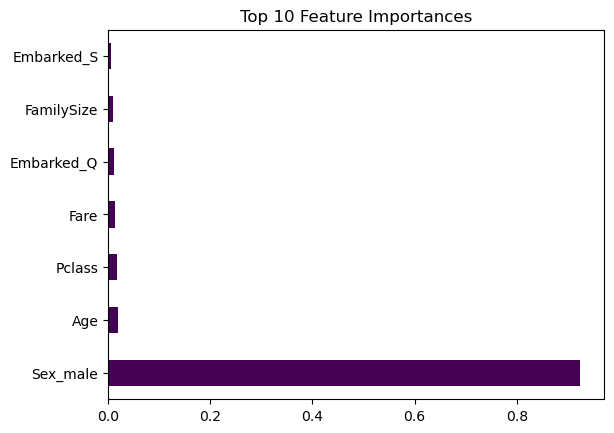

In [69]:
# Feature Importance
feature_importances = pd.Series(rf_model.feature_importances_, index=X_train.columns)
feature_importances.nlargest(10).plot(kind='barh', colormap='viridis')
plt.title("Top 10 Feature Importances")
plt.show()


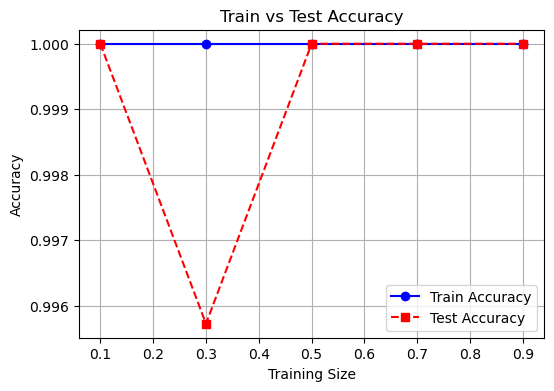

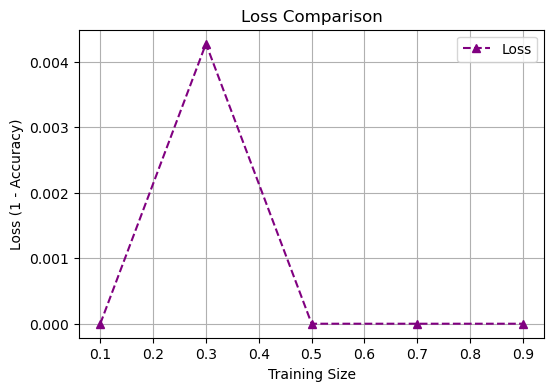

In [70]:
# Training vs Testing Accuracy and Loss Comparison

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

train_sizes = [0.1, 0.3, 0.5, 0.7, 0.9]
train_scores = []
test_scores = []
loss_values = []

for size in train_sizes:
    X_partial, X_val, y_partial, y_val = train_test_split(X_train, y_train, train_size=size, random_state=42)

    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_partial, y_partial)

    train_accuracy = accuracy_score(y_partial, model.predict(X_partial))
    test_accuracy = accuracy_score(y_val, model.predict(X_val))

    train_scores.append(train_accuracy)
    test_scores.append(test_accuracy)
    loss_values.append(1 - test_accuracy)

# Plot Train vs Test Accuracy
plt.figure(figsize=(6, 4))
plt.plot(train_sizes, train_scores, label="Train Accuracy", marker="o", linestyle="-", color="blue")
plt.plot(train_sizes, test_scores, label="Test Accuracy", marker="s", linestyle="--", color="red")
plt.xlabel("Training Size")
plt.ylabel("Accuracy")
plt.title("Train vs Test Accuracy")
plt.legend()
plt.grid()
plt.show()

# Plot Loss Comparison
plt.figure(figsize=(6, 4))
plt.plot(train_sizes, loss_values, label="Loss", marker="^", linestyle="--", color="purple")
plt.xlabel("Training Size")
plt.ylabel("Loss (1 - Accuracy)")
plt.title("Loss Comparison")
plt.legend()
plt.grid()
plt.show()